### black_hole_luminosity
---
1. This script looks at the dependence of black hole luminosity on galaxy populations and misalignment.
2. The populations are split on morphology (sSFR), group membership and mass.

---

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import split_population
import plot_population
import imp
imp.reload(split_population)
imp.reload(plot_population)

from astropy.cosmology import Planck15

In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [29]:
# ---------------------------------------------------------------------------------------
# Loading in TNG100 sample with z=0 info to select samples.
tng100_main = pd.read_csv('/Users/cd201/morphology_misalignment/catalogues/tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = split_population.tng100_pa_sample(tng100_main)

# Breaking down morphology (deviations from sfms).
QU, SF, GV = split_population.SFMS_breakdown(tng100_pa)

# ---------------------------------------------------------------------------------------
# Loading in mass history file.
mass_tab = pd.read_csv('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/tng100_bh_history.csv')

In [32]:
# converting branch_z to lookback times.
mass_tab['branch_lookback_time'] = Planck15.lookback_time(mass_tab.branch_z.values).value

#### 1. Firstly considering the overall population split on PA.

In [34]:
all_tab, align_tab, mis_tab = split_population.combine_with_tree_split_on_pa(tng100_pa, mass_tab, lower_PA=30, upper_PA=30)
_, _, counter_tab = split_population.combine_with_tree_split_on_pa(tng100_pa, mass_tab, lower_PA=30, upper_PA=150)



All:3633.2 Aligned:2868.36 Misaligned:764.84
All:3633.2 Aligned:2868.36 Misaligned:95.98


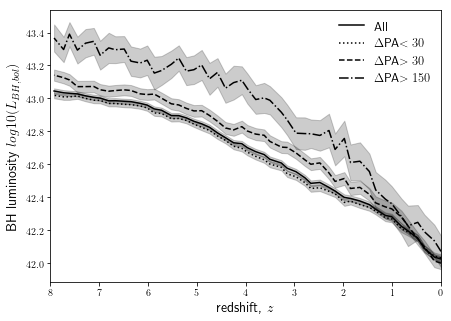

In [36]:
fig, ax = plt.subplots(1, figsize=(7,5))
plot_population.plot_property_evolution(all_tab.branch_lookback_time.values[all_tab.log10_Lbh_bol.values > 0], all_tab.log10_Lbh_bol.values[all_tab.log10_Lbh_bol.values > 0], ax, r'All', color='k')
plot_population.plot_property_evolution(align_tab.branch_lookback_time.values[align_tab.log10_Lbh_bol.values > 0], align_tab.log10_Lbh_bol.values[align_tab.log10_Lbh_bol.values > 0], ax, r'$\Delta$PA$ < 30$', color='k', linestyle='dotted')
plot_population.plot_property_evolution(mis_tab.branch_lookback_time.values[mis_tab.log10_Lbh_bol.values > 0], mis_tab.log10_Lbh_bol.values[mis_tab.log10_Lbh_bol.values > 0], ax, r'$\Delta$PA$ > 30$', color='k', linestyle='dashed')
plot_population.plot_property_evolution(counter_tab.branch_lookback_time.values[counter_tab.log10_Lbh_bol.values > 0], counter_tab.log10_Lbh_bol.values[counter_tab.log10_Lbh_bol.values > 0], ax, r'$\Delta$PA$ > 150$', color='k', linestyle='-.')

ax.legend(frameon=False, fontsize=12.5, loc='upper right')
ax.set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax.set_xlabel(r'redshift, $z$',fontsize=14)
ax.set_xlim([0, 8])
ax.invert_xaxis()
plt.show()

#### 2. Secondly considering split on morphology

In [41]:
QU, SF, GV = split_population.SFMS_breakdown(tng100_pa)
QU_tab, QU_align_tab, QU_mis_tab = split_population.combine_with_tree_split_on_pa(QU, mass_tab, lower_PA=30, upper_PA=30)
_, _, QU_counter_tab = split_population.combine_with_tree_split_on_pa(QU, mass_tab, lower_PA=30, upper_PA=150)

GV_tab, GV_align_tab, GV_mis_tab = split_population.combine_with_tree_split_on_pa(GV, mass_tab, lower_PA=30, upper_PA=30)
_, _, GV_counter_tab = split_population.combine_with_tree_split_on_pa(GV, mass_tab, lower_PA=30, upper_PA=150)

SF_tab, SF_align_tab, SF_mis_tab = split_population.combine_with_tree_split_on_pa(SF, mass_tab, lower_PA=30, upper_PA=30)
_, _, SF_counter_tab = split_population.combine_with_tree_split_on_pa(SF, mass_tab, lower_PA=30, upper_PA=150)


All:1303.78 Aligned:902.92 Misaligned:400.86
All:1303.78 Aligned:902.92 Misaligned:54.98
All:786.82 Aligned:637.82 Misaligned:149.0
All:786.82 Aligned:637.82 Misaligned:23.0
All:1542.6 Aligned:1327.62 Misaligned:214.98
All:1542.6 Aligned:1327.62 Misaligned:18.0


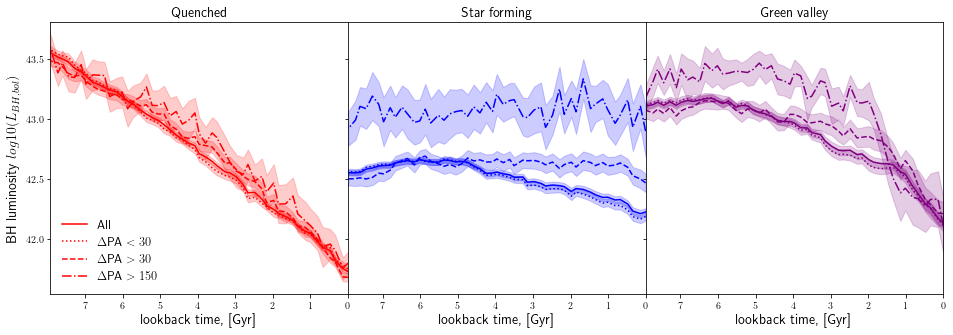

In [53]:
fig, ax = plt.subplots(1,3, figsize=(16 ,5), sharex='all', sharey='all')

# Quenched.
plot_population.plot_property_evolution(QU_tab.branch_lookback_time.values[QU_tab.log10_Lbh_bol.values > 0], QU_tab.log10_Lbh_bol.values[QU_tab.log10_Lbh_bol.values > 0], ax[0], r'All', color='r')
plot_population.plot_property_evolution(QU_align_tab.branch_lookback_time.values[QU_align_tab.log10_Lbh_bol.values > 0], QU_align_tab.log10_Lbh_bol.values[QU_align_tab.log10_Lbh_bol.values > 0], ax[0], r'$\Delta$PA $ < 30$', color='r', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab.branch_lookback_time.values[QU_mis_tab.log10_Lbh_bol.values > 0], QU_mis_tab.log10_Lbh_bol.values[QU_mis_tab.log10_Lbh_bol.values > 0], ax[0],  r'$\Delta$PA $ > 30$', color='r', linestyle='dashed') 
plot_population.plot_property_evolution(QU_counter_tab.branch_lookback_time.values[QU_counter_tab.log10_Lbh_bol.values > 0], QU_counter_tab.log10_Lbh_bol.values[QU_counter_tab.log10_Lbh_bol.values > 0], ax[0], r'$\Delta$PA $ > 150$', color='r', linestyle='-.')

# Star forming.
plot_population.plot_property_evolution(SF_tab.branch_lookback_time.values[SF_tab.log10_Lbh_bol.values > 0], SF_tab.log10_Lbh_bol.values[SF_tab.log10_Lbh_bol.values > 0], ax[1], r'Star forming', color='b')
plot_population.plot_property_evolution(SF_align_tab.branch_lookback_time.values[SF_align_tab.log10_Lbh_bol.values > 0], SF_align_tab.log10_Lbh_bol.values[SF_align_tab.log10_Lbh_bol.values > 0], ax[1], color='b', linestyle='dotted')
plot_population.plot_property_evolution(SF_mis_tab.branch_lookback_time.values[SF_mis_tab.log10_Lbh_bol.values > 0], SF_mis_tab.log10_Lbh_bol.values[SF_mis_tab.log10_Lbh_bol.values > 0], ax[1], color='b', linestyle='dashed') 
plot_population.plot_property_evolution(SF_counter_tab.branch_lookback_time.values[SF_counter_tab.log10_Lbh_bol.values > 0], SF_counter_tab.log10_Lbh_bol.values[SF_counter_tab.log10_Lbh_bol.values > 0], ax[1], color='b', linestyle='-.')

# Green valley.
plot_population.plot_property_evolution(GV_tab.branch_lookback_time.values[GV_tab.log10_Lbh_bol.values > 0], GV_tab.log10_Lbh_bol.values[GV_tab.log10_Lbh_bol.values > 0], ax[2], r'Green valley', color='purple')
plot_population.plot_property_evolution(GV_align_tab.branch_lookback_time.values[GV_align_tab.log10_Lbh_bol.values > 0], GV_align_tab.log10_Lbh_bol.values[GV_align_tab.log10_Lbh_bol.values > 0], ax[2], color='purple', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab.branch_lookback_time.values[GV_mis_tab.log10_Lbh_bol.values > 0], GV_mis_tab.log10_Lbh_bol.values[GV_mis_tab.log10_Lbh_bol.values > 0], ax[2], color='purple', linestyle='dashed')
plot_population.plot_property_evolution(GV_counter_tab.branch_lookback_time.values[GV_counter_tab.log10_Lbh_bol.values > 0], GV_counter_tab.log10_Lbh_bol.values[GV_counter_tab.log10_Lbh_bol.values > 0], ax[2], color='purple', linestyle='-.')

ax[0].legend(frameon=False, fontsize=12.5, loc='lower left')
ax[0].set_title('Quenched', fontsize=14)
ax[0].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax[0].set_xlabel('lookback time, [Gyr]', fontsize=14)

ax[1].set_title('Star forming', fontsize=14)
#ax[1].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax[1].set_xlabel('lookback time, [Gyr]', fontsize=14)

ax[2].set_title('Green valley', fontsize=14)
#ax[2].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax[2].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[0].set_xlim([0, 7.93])
ax[0].invert_xaxis()

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### 3. Now considering split on mass only.

In [54]:
high_mass_all_tab, high_mass_align_tab, high_mass_mis_tab, low_mass_all_tab, low_mass_align_tab, low_mass_mis_tab = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=33, upper_percentile=66)    
_, _, high_mass_counter_tab, _, _, low_mass_counter_tab = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=33, upper_percentile=66)    



High mass. All:1236.66 Aligned:939.82 Misaligned:296.84
Low mass.  All:1197.78 Aligned:986.78 Misaligned:211.0
High mass. All:1236.66 Aligned:939.82 Misaligned:42.98
Low mass.  All:1197.78 Aligned:986.78 Misaligned:14.0


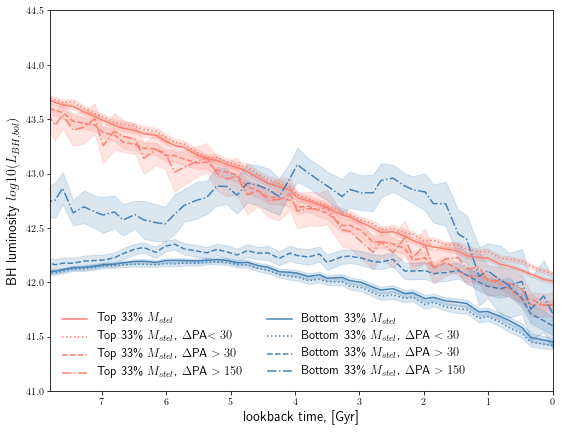

In [49]:
fig, ax = plt.subplots(1, figsize=(9,7))
plot_population.plot_property_evolution(high_mass_all_tab.branch_lookback_time.values[high_mass_all_tab.log10_Lbh_bol.values > 0], high_mass_all_tab.log10_Lbh_bol.values[high_mass_all_tab.log10_Lbh_bol.values > 0], ax, 'Top 33\% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(high_mass_align_tab.branch_lookback_time.values[high_mass_align_tab.log10_Lbh_bol.values > 0], high_mass_align_tab.log10_Lbh_bol.values[high_mass_align_tab.log10_Lbh_bol.values > 0], ax, r'Top 33\% $M_{stel}$, $\Delta$PA$ < 30$', color='salmon', linestyle='dotted')
plot_population.plot_property_evolution(high_mass_mis_tab.branch_lookback_time.values[high_mass_mis_tab.log10_Lbh_bol.values > 0], high_mass_mis_tab.log10_Lbh_bol.values[high_mass_mis_tab.log10_Lbh_bol.values > 0], ax, 'Top 33\% $M_{stel}$, $\Delta$PA $> 30$', color='salmon', linestyle='dashed')
plot_population.plot_property_evolution(high_mass_counter_tab.branch_lookback_time.values[high_mass_counter_tab.log10_Lbh_bol.values > 0], high_mass_counter_tab.log10_Lbh_bol.values[high_mass_counter_tab.log10_Lbh_bol.values > 0], ax, 'Top 33\% $M_{stel}$, $\Delta$PA $> 150$', color='salmon', linestyle='-.')

plot_population.plot_property_evolution(low_mass_all_tab.branch_lookback_time.values[low_mass_all_tab.log10_Lbh_bol.values > 0], low_mass_all_tab.log10_Lbh_bol.values[low_mass_all_tab.log10_Lbh_bol.values > 0], ax, 'Bottom 33\% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(low_mass_align_tab.branch_lookback_time.values[low_mass_align_tab.log10_Lbh_bol.values > 0], low_mass_align_tab.log10_Lbh_bol.values[low_mass_align_tab.log10_Lbh_bol.values > 0], ax, 'Bottom 33\% $M_{stel}$, $\Delta$PA $< 30$', color='steelblue', linestyle='dotted')
plot_population.plot_property_evolution(low_mass_mis_tab.branch_lookback_time.values[low_mass_mis_tab.log10_Lbh_bol.values > 0], low_mass_mis_tab.log10_Lbh_bol.values[low_mass_mis_tab.log10_Lbh_bol.values > 0], ax, 'Bottom 33\% $M_{stel}$, $\Delta$PA $> 30$', color='steelblue', linestyle='dashed')
plot_population.plot_property_evolution(low_mass_counter_tab.branch_lookback_time.values[low_mass_counter_tab.log10_Lbh_bol.values > 0], low_mass_counter_tab.log10_Lbh_bol.values[low_mass_counter_tab.log10_Lbh_bol.values > 0], ax, 'Bottom 33\% $M_{stel}$, $\Delta$PA $> 150$', color='steelblue', linestyle='-.')

ax.legend(frameon=False, fontsize=12.5, loc='lower left', ncol=2)
ax.set_ylabel('BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax.set_xlabel('lookback time, [Gyr]', fontsize=14)
ax.set_xlim([0, 7.8])
ax.set_ylim([41, 44.5])
ax.invert_xaxis()
plt.show()

#### 4. Splitting on both morphology and mass bins for each.

In [55]:
QU_tab_HM, QU_align_tab_HM, QU_mis_tab_HM, QU_tab_LM, QU_align_tab_LM, QU_mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(QU, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=33, upper_percentile=66)
_, _, QU_counter_tab_HM, _, _, QU_counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(QU, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=33, upper_percentile=66)

GV_tab_HM, GV_align_tab_HM, GV_mis_tab_HM, GV_tab_LM, GV_align_tab_LM, GV_mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(GV, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=33, upper_percentile=66)
_, _, GV_counter_tab_HM, _, _, GV_counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(GV, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=33, upper_percentile=66)

SF_tab_HM, SF_align_tab_HM, SF_mis_tab_HM, SF_tab_LM, SF_align_tab_LM, SF_mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(SF, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=33, upper_percentile=66)  
_, _, SF_counter_tab_HM, _, _, SF_counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(SF, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=33, upper_percentile=66)  



High mass. All:443.88 Aligned:328.96 Misaligned:114.92
Low mass.  All:429.92 Aligned:261.96 Misaligned:167.96
High mass. All:443.88 Aligned:328.96 Misaligned:15.98
Low mass.  All:429.92 Aligned:261.96 Misaligned:21.0
High mass. All:267.9 Aligned:231.9 Misaligned:36.0
Low mass.  All:259.96 Aligned:204.96 Misaligned:55.0
High mass. All:267.9 Aligned:231.9 Misaligned:5.0
Low mass.  All:259.96 Aligned:204.96 Misaligned:7.0
High mass. All:524.8 Aligned:460.82 Misaligned:63.98
Low mass.  All:510.78 Aligned:433.82 Misaligned:76.96
High mass. All:524.8 Aligned:460.82 Misaligned:10.0
Low mass.  All:510.78 Aligned:433.82 Misaligned:3.0


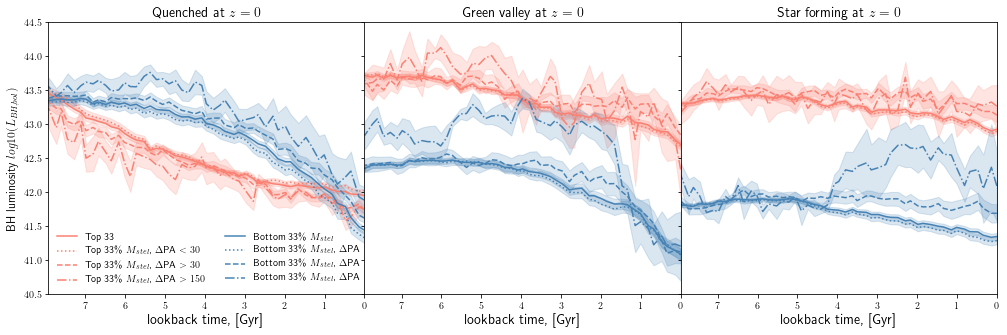

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5), sharey='all', sharex='all')

# Quenched.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_HM.branch_lookback_time.values[QU_tab_HM.log10_Lbh_bol.values > 0], QU_tab_HM.log10_Lbh_bol.values[QU_tab_HM.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(QU_align_tab_HM.branch_lookback_time.values[QU_align_tab_HM.log10_Lbh_bol.values > 0], QU_align_tab_HM.log10_Lbh_bol.values[QU_align_tab_HM.log10_Lbh_bol.values > 0], ax[0], r'Top 33\% $M_{stel}$, $\Delta$PA $< 30$', color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_HM.branch_lookback_time.values[QU_mis_tab_HM.log10_Lbh_bol.values > 0], QU_mis_tab_HM.log10_Lbh_bol.values[QU_mis_tab_HM.log10_Lbh_bol.values > 0], ax[0], r'Top 33\% $M_{stel}$, $\Delta$PA $> 30$',color='salmon', linestyle='dashed') 
plot_population.plot_property_evolution(QU_counter_tab_HM.branch_lookback_time.values[QU_counter_tab_HM.log10_Lbh_bol.values > 0], QU_counter_tab_HM.log10_Lbh_bol.values[QU_counter_tab_HM.log10_Lbh_bol.values > 0], ax[0], r'Top 33\% $M_{stel}$, $\Delta$PA $> 150$',color='salmon', linestyle='-.') 

# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_LM.branch_lookback_time.values[QU_tab_LM.log10_Lbh_bol.values > 0], QU_tab_LM.log10_Lbh_bol.values[QU_tab_LM.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33\% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(QU_align_tab_LM.branch_lookback_time.values[QU_align_tab_LM.log10_Lbh_bol.values > 0], QU_align_tab_LM.log10_Lbh_bol.values[QU_align_tab_LM.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33\% $M_{stel}$, $\Delta$PA $< 30$', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_LM.branch_lookback_time.values[QU_mis_tab_LM.log10_Lbh_bol.values > 0], QU_mis_tab_LM.log10_Lbh_bol.values[QU_mis_tab_LM.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33\% $M_{stel}$, $\Delta$PA $> 30$',color='steelblue', linestyle='dashed') 
plot_population.plot_property_evolution(QU_counter_tab_LM.branch_lookback_time.values[QU_counter_tab_LM.log10_Lbh_bol.values > 0], QU_counter_tab_LM.log10_Lbh_bol.values[QU_counter_tab_LM.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33\% $M_{stel}$, $\Delta$PA $> 150$',color='steelblue', linestyle='-.') 

ax[0].set_title('Quenched at $z=0$', fontsize=14)
ax[0].legend(frameon=False, fontsize=10, loc='lower left', ncol=2)
ax[0].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[0].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[0].set_xlim([0, 7.93])
ax[0].set_ylim([40.5, 44.5])
ax[0].invert_xaxis()

# Green valley.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_HM.branch_lookback_time.values[GV_tab_HM.log10_Lbh_bol.values > 0], GV_tab_HM.log10_Lbh_bol.values[GV_tab_HM.log10_Lbh_bol.values > 0], ax[1], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(GV_align_tab_HM.branch_lookback_time.values[GV_align_tab_HM.log10_Lbh_bol.values > 0], GV_align_tab_HM.log10_Lbh_bol.values[GV_align_tab_HM.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_HM.branch_lookback_time.values[GV_mis_tab_HM.log10_Lbh_bol.values > 0], GV_mis_tab_HM.log10_Lbh_bol.values[GV_mis_tab_HM.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dashed') 
plot_population.plot_property_evolution(GV_counter_tab_HM.branch_lookback_time.values[GV_counter_tab_HM.log10_Lbh_bol.values > 0], GV_counter_tab_HM.log10_Lbh_bol.values[GV_counter_tab_HM.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$, $\Delta$PA > 150',color='salmon', linestyle='-.') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_LM.branch_lookback_time.values[GV_tab_LM.log10_Lbh_bol.values > 0], GV_tab_LM.log10_Lbh_bol.values[GV_tab_LM.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(GV_align_tab_LM.branch_lookback_time.values[GV_align_tab_LM.log10_Lbh_bol.values > 0], GV_align_tab_LM.log10_Lbh_bol.values[GV_align_tab_LM.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$, $\Delta$PA $< 30$', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_LM.branch_lookback_time.values[GV_mis_tab_LM.log10_Lbh_bol.values > 0], GV_mis_tab_LM.log10_Lbh_bol.values[GV_mis_tab_LM.log10_Lbh_bol.values > 0], ax[1], 'Bottom 33% $M_{stel}$, $\Delta$PA $> 30$',color='steelblue', linestyle='dashed') 
plot_population.plot_property_evolution(GV_counter_tab_LM.branch_lookback_time.values[GV_counter_tab_LM.log10_Lbh_bol.values > 0], GV_counter_tab_LM.log10_Lbh_bol.values[GV_counter_tab_LM.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$, $\Delta$PA $> 150$',color='steelblue', linestyle='-.') 

ax[1].set_title('Green valley at $z=0$', fontsize=14)
#ax[1].legend(frameon=False, fontsize=12.5, loc='lower left')
#ax[1].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[1].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[1].invert_xaxis()
#ax[1].yaxis.set_tick_params(labelbottom=True)

# Star forming.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_HM.branch_lookback_time.values[SF_tab_HM.log10_Lbh_bol.values > 0], SF_tab_HM.log10_Lbh_bol.values[SF_tab_HM.log10_Lbh_bol.values > 0], ax[2], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(SF_align_tab_HM.branch_lookback_time.values[SF_align_tab_HM.log10_Lbh_bol.values > 0], SF_align_tab_HM.log10_Lbh_bol.values[SF_align_tab_HM.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_HM.branch_lookback_time.values[SF_mis_tab_HM.log10_Lbh_bol.values > 0], SF_mis_tab_HM.log10_Lbh_bol.values[SF_mis_tab_HM.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dashed') 
plot_population.plot_property_evolution(SF_counter_tab_HM.branch_lookback_time.values[SF_counter_tab_HM.log10_Lbh_bol.values > 0], SF_counter_tab_HM.log10_Lbh_bol.values[SF_counter_tab_HM.log10_Lbh_bol.values > 0], ax[2], r'Top 33\% $M_{stel}$, $\Delta$PA > 150',color='salmon', linestyle='-.') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_LM.branch_lookback_time.values[SF_tab_LM.log10_Lbh_bol.values > 0], SF_tab_LM.log10_Lbh_bol.values[SF_tab_LM.log10_Lbh_bol.values > 0], ax[2], r'Bottom 50\% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(SF_align_tab_LM.branch_lookback_time.values[SF_align_tab_LM.log10_Lbh_bol.values > 0], SF_align_tab_LM.log10_Lbh_bol.values[SF_align_tab_LM.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_LM.branch_lookback_time.values[SF_mis_tab_LM.log10_Lbh_bol.values > 0], SF_mis_tab_LM.log10_Lbh_bol.values[SF_mis_tab_LM.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dashed') 
plot_population.plot_property_evolution(SF_counter_tab_LM.branch_lookback_time.values[SF_counter_tab_LM.log10_Lbh_bol.values > 0], SF_counter_tab_LM.log10_Lbh_bol.values[SF_counter_tab_LM.log10_Lbh_bol.values > 0], ax[2], r'Bottom 33\% $M_{stel}$, $\Delta$PA > 150',color='steelblue', linestyle='-.') 

ax[2].set_title('Star forming at $z=0$', fontsize=14)
#ax[2].legend(frameon=False, fontsize=12.5, loc='lower left')
#ax[2].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[2].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[2].invert_xaxis()
#ax[2].yaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### 5. Splitting on both morphology and group membership.

In [17]:
QU_tab_cen, QU_align_tab_cen, QU_mis_tab_cen, QU_tab_sat, QU_align_tab_sat, QU_mis_tab_sat = split_population.combine_with_tree_split_on_pa_and_group(QU, mass_tab, lower_PA=30, upper_PA=30)  
GV_tab_cen, GV_align_tab_cen, GV_mis_tab_cen, GV_tab_sat, GV_align_tab_sat, GV_mis_tab_sat = split_population.combine_with_tree_split_on_pa_and_group(GV, mass_tab, lower_PA=30, upper_PA=30)
SF_tab_cen, SF_align_tab_cen, SF_mis_tab_cen, SF_tab_sat, SF_align_tab_sat, SF_mis_tab_sat = split_population.combine_with_tree_split_on_pa_and_group(SF, mass_tab, lower_PA=30, upper_PA=30)


Centrals. All:876.86 Aligned:649.94 Misaligned:226.92
Satellites. All:426.92 Aligned:252.98 Misaligned:173.94
Centrals. All:379.9 Aligned:342.9 Misaligned:37.0
Satellites. All:406.92 Aligned:294.92 Misaligned:112.0
Centrals. All:1084.64 Aligned:968.66 Misaligned:115.98
Satellites. All:457.96 Aligned:358.96 Misaligned:99.0


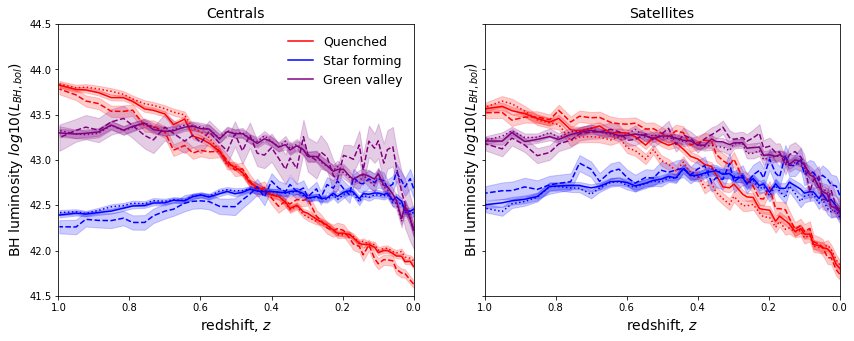

In [165]:
fig, ax = plt.subplots(1,2, figsize=(14,5), sharex='all', sharey='all')

# Quenched.
plot_population.plot_property_evolution(QU_tab_cen.branch_z.values[QU_tab_cen.log10_Lbh_bol.values > 0], QU_tab_cen.log10_Lbh_bol.values[QU_tab_cen.log10_Lbh_bol.values > 0], ax[0], r'Quenched', color='r')
plot_population.plot_property_evolution(QU_align_tab_cen.branch_z.values[QU_align_tab_cen.log10_Lbh_bol.values > 0], QU_align_tab_cen.log10_Lbh_bol.values[QU_align_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='r', linestyle='dotted') # ,r'$\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(QU_mis_tab_cen.branch_z.values[QU_mis_tab_cen.log10_Lbh_bol.values > 0], QU_mis_tab_cen.log10_Lbh_bol.values[QU_mis_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='r', linestyle='dashed') # ,r'$\Delta$PA $\geq$ 30$^{\circ}$')

# Star forming.
plot_population.plot_property_evolution(SF_tab_cen.branch_z.values[SF_tab_cen.log10_Lbh_bol.values > 0], SF_tab_cen.log10_Lbh_bol.values[SF_tab_cen.log10_Lbh_bol.values > 0], ax[0], r'Star forming', color='b')
plot_population.plot_property_evolution(SF_align_tab_cen.branch_z.values[SF_align_tab_cen.log10_Lbh_bol.values > 0], SF_align_tab_cen.log10_Lbh_bol.values[SF_align_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='b', linestyle='dotted') # ,r'SF $\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(SF_mis_tab_cen.branch_z.values[SF_mis_tab_cen.log10_Lbh_bol.values > 0], SF_mis_tab_cen.log10_Lbh_bol.values[SF_mis_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='b', linestyle='dashed') # ,r'SF $\Delta$PA $\geq$ 30$^{\circ}$')

# Green valley.
plot_population.plot_property_evolution(GV_tab_cen.branch_z.values[GV_tab_cen.log10_Lbh_bol.values > 0], GV_tab_cen.log10_Lbh_bol.values[GV_tab_cen.log10_Lbh_bol.values > 0], ax[0], r'Green valley', color='purple')
plot_population.plot_property_evolution(GV_align_tab_cen.branch_z.values[GV_align_tab_cen.log10_Lbh_bol.values > 0], GV_align_tab_cen.log10_Lbh_bol.values[GV_align_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='purple', linestyle='dotted') #, r'GV $\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(GV_mis_tab_cen.branch_z.values[GV_mis_tab_cen.log10_Lbh_bol.values > 0], GV_mis_tab_cen.log10_Lbh_bol.values[GV_mis_tab_cen.log10_Lbh_bol.values > 0], ax[0], color='purple', linestyle='dashed') #, r'GV $\Delta$PA $\geq$ 30$^{\circ}$')

ax[0].set_title('Centrals', fontsize=14)
ax[0].legend(frameon=False, fontsize=12.5, loc='upper right')
ax[0].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax[0].set_xlabel(r'redshift, $z$',fontsize=14)
ax[0].set_xlim([0, 1])
ax[0].invert_xaxis()

# Quenched.
plot_population.plot_property_evolution(QU_tab_sat.branch_z.values[QU_tab_sat.log10_Lbh_bol.values > 0], QU_tab_sat.log10_Lbh_bol.values[QU_tab_sat.log10_Lbh_bol.values > 0], ax[1], r'Quenched', color='r')
plot_population.plot_property_evolution(QU_align_tab_sat.branch_z.values[QU_align_tab_sat.log10_Lbh_bol.values > 0], QU_align_tab_sat.log10_Lbh_bol.values[QU_align_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='r', linestyle='dotted') # ,r'$\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(QU_mis_tab_sat.branch_z.values[QU_mis_tab_sat.log10_Lbh_bol.values > 0], QU_mis_tab_sat.log10_Lbh_bol.values[QU_mis_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='r', linestyle='dashed') # ,r'$\Delta$PA $\geq$ 30$^{\circ}$')

# Star forming.
plot_population.plot_property_evolution(SF_tab_sat.branch_z.values[SF_tab_sat.log10_Lbh_bol.values > 0], SF_tab_sat.log10_Lbh_bol.values[SF_tab_sat.log10_Lbh_bol.values > 0], ax[1], r'Star forming', color='b')
plot_population.plot_property_evolution(SF_align_tab_sat.branch_z.values[SF_align_tab_sat.log10_Lbh_bol.values > 0], SF_align_tab_sat.log10_Lbh_bol.values[SF_align_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='b', linestyle='dotted') # ,r'SF $\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(SF_mis_tab_sat.branch_z.values[SF_mis_tab_sat.log10_Lbh_bol.values > 0], SF_mis_tab_sat.log10_Lbh_bol.values[SF_mis_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='b', linestyle='dashed') # ,r'SF $\Delta$PA $\geq$ 30$^{\circ}$')

# Green valley.
plot_population.plot_property_evolution(GV_tab_sat.branch_z.values[GV_tab_sat.log10_Lbh_bol.values > 0], GV_tab_sat.log10_Lbh_bol.values[GV_tab_sat.log10_Lbh_bol.values > 0], ax[1], r'Green valley', color='purple')
plot_population.plot_property_evolution(GV_align_tab_sat.branch_z.values[GV_align_tab_sat.log10_Lbh_bol.values > 0], GV_align_tab_sat.log10_Lbh_bol.values[GV_align_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='purple', linestyle='dotted') #, r'GV $\Delta$PA < 30$^{\circ}$')
plot_population.plot_property_evolution(GV_mis_tab_sat.branch_z.values[GV_mis_tab_sat.log10_Lbh_bol.values > 0], GV_mis_tab_sat.log10_Lbh_bol.values[GV_mis_tab_sat.log10_Lbh_bol.values > 0], ax[1], color='purple', linestyle='dashed') #, r'GV $\Delta$PA $\geq$ 30$^{\circ}$')

ax[1].set_title('Satellites', fontsize=14)
#ax[1].legend(frameon=False, fontsize=12.5, loc='upper right')
ax[1].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=14)
ax[1].set_xlabel(r'redshift, $z$',fontsize=14)
ax[1].set_xlim([0, 1])
ax[1].set_ylim([41.5, 44.5])
ax[1].invert_xaxis()
plt.show()

#### 6. Splitting on morphology, group membership and mass.

In [160]:
QU_cen = QU[QU.central_flag.values == 1]
GV_cen = GV[GV.central_flag.values == 1]
SF_cen = SF[SF.central_flag.values == 1]

QU_tab_HM_cen, QU_align_tab_HM_cen, QU_mis_tab_HM_cen, QU_tab_LM_cen, QU_align_tab_LM_cen, QU_mis_tab_LM_cen = split_population.combine_with_tree_split_on_pa_and_mass(QU_cen, mass_tab, lower_PA=30, upper_PA=30)
GV_tab_HM_cen, GV_align_tab_HM_cen, GV_mis_tab_HM_cen, GV_tab_LM_cen, GV_align_tab_LM_cen, GV_mis_tab_LM_cen = split_population.combine_with_tree_split_on_pa_and_mass(GV_cen, mass_tab, lower_PA=30, upper_PA=30)
SF_tab_HM_cen, SF_align_tab_HM_cen, SF_mis_tab_HM_cen, SF_tab_LM_cen, SF_align_tab_LM_cen, SF_mis_tab_LM_cen = split_population.combine_with_tree_split_on_pa_and_mass(SF_cen, mass_tab, lower_PA=30, upper_PA=30)


High mass. All:218.92 Aligned:162.98 Misaligned:55.94
Low mass.  All:219.96 Aligned:155.98 Misaligned:63.98
High mass. All:94.96 Aligned:88.96 Misaligned:6.0
Low mass.  All:94.98 Aligned:84.98 Misaligned:10.0
High mass. All:270.88 Aligned:250.9 Misaligned:19.98
Low mass.  All:271.92 Aligned:241.92 Misaligned:30.0


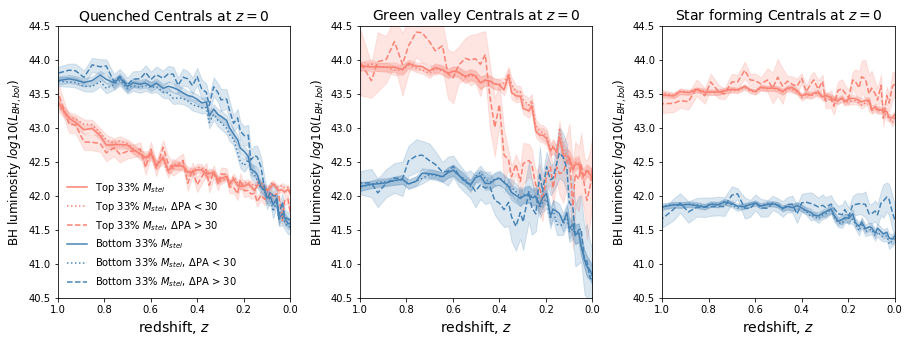

In [161]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey='all', sharex='all')

# Quenched.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_HM_cen.branch_z.values[QU_tab_HM_cen.log10_Lbh_bol.values > 0], QU_tab_HM_cen.log10_Lbh_bol.values[QU_tab_HM_cen.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(QU_align_tab_HM_cen.branch_z.values[QU_align_tab_HM_cen.log10_Lbh_bol.values > 0], QU_align_tab_HM_cen.log10_Lbh_bol.values[QU_align_tab_HM_cen.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$, $\Delta$PA < 30', color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_HM_cen.branch_z.values[QU_mis_tab_HM_cen.log10_Lbh_bol.values > 0], QU_mis_tab_HM_cen.log10_Lbh_bol.values[QU_mis_tab_HM_cen.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$, $\Delta$PA > 30',color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_LM_cen.branch_z.values[QU_tab_LM_cen.log10_Lbh_bol.values > 0], QU_tab_LM_cen.log10_Lbh_bol.values[QU_tab_LM_cen.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(QU_align_tab_LM_cen.branch_z.values[QU_align_tab_LM_cen.log10_Lbh_bol.values > 0], QU_align_tab_LM_cen.log10_Lbh_bol.values[QU_align_tab_LM_cen.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$, $\Delta$PA < 30', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_LM_cen.branch_z.values[QU_mis_tab_LM_cen.log10_Lbh_bol.values > 0], QU_mis_tab_LM_cen.log10_Lbh_bol.values[QU_mis_tab_LM_cen.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$, $\Delta$PA > 30',color='steelblue', linestyle='dashed') 

ax[0].set_title('Quenched Centrals at $z=0$', fontsize=14)
ax[0].legend(frameon=False, fontsize=10, loc='lower left')
ax[0].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[0].set_xlabel(r'redshift, $z$',fontsize=14)
ax[0].set_xlim([0, 1])
ax[0].set_ylim([40.5, 44.5])
ax[0].invert_xaxis()

# Green valley.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_HM_cen.branch_z.values[GV_tab_HM_cen.log10_Lbh_bol.values > 0], GV_tab_HM_cen.log10_Lbh_bol.values[GV_tab_HM_cen.log10_Lbh_bol.values > 0], ax[1], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(GV_align_tab_HM_cen.branch_z.values[GV_align_tab_HM_cen.log10_Lbh_bol.values > 0], GV_align_tab_HM_cen.log10_Lbh_bol.values[GV_align_tab_HM_cen.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_HM_cen.branch_z.values[GV_mis_tab_HM_cen.log10_Lbh_bol.values > 0], GV_mis_tab_HM_cen.log10_Lbh_bol.values[GV_mis_tab_HM_cen.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_LM_cen.branch_z.values[GV_tab_LM_cen.log10_Lbh_bol.values > 0], GV_tab_LM_cen.log10_Lbh_bol.values[GV_tab_LM_cen.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(GV_align_tab_LM_cen.branch_z.values[GV_align_tab_LM_cen.log10_Lbh_bol.values > 0], GV_align_tab_LM_cen.log10_Lbh_bol.values[GV_align_tab_LM_cen.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$, $\Delta$PA < 30', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_LM_cen.branch_z.values[GV_mis_tab_LM_cen.log10_Lbh_bol.values > 0], GV_mis_tab_LM_cen.log10_Lbh_bol.values[GV_mis_tab_LM_cen.log10_Lbh_bol.values > 0], ax[1], 'Bottom 33% $M_{stel}$, $\Delta$PA > 30',color='steelblue', linestyle='dashed') 

ax[1].set_title('Green valley Centrals at $z=0$', fontsize=14)
#ax[1].legend(frameon=False, fontsize=12.5, loc='lower left')
ax[1].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[1].set_xlabel(r'redshift, $z$',fontsize=14)
ax[1].set_xlim([0, 1])
ax[1].invert_xaxis()
ax[1].yaxis.set_tick_params(labelbottom=True)

# Star forming.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_HM_cen.branch_z.values[SF_tab_HM_cen.log10_Lbh_bol.values > 0], SF_tab_HM_cen.log10_Lbh_bol.values[SF_tab_HM_cen.log10_Lbh_bol.values > 0], ax[2], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(SF_align_tab_HM_cen.branch_z.values[SF_align_tab_HM_cen.log10_Lbh_bol.values > 0], SF_align_tab_HM_cen.log10_Lbh_bol.values[SF_align_tab_HM_cen.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_HM_cen.branch_z.values[SF_mis_tab_HM_cen.log10_Lbh_bol.values > 0], SF_mis_tab_HM_cen.log10_Lbh_bol.values[SF_mis_tab_HM_cen.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_LM_cen.branch_z.values[SF_tab_LM_cen.log10_Lbh_bol.values > 0], SF_tab_LM_cen.log10_Lbh_bol.values[SF_tab_LM_cen.log10_Lbh_bol.values > 0], ax[2], r'Bottom 50% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(SF_align_tab_LM_cen.branch_z.values[SF_align_tab_LM_cen.log10_Lbh_bol.values > 0], SF_align_tab_LM_cen.log10_Lbh_bol.values[SF_align_tab_LM_cen.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_LM_cen.branch_z.values[SF_mis_tab_LM_cen.log10_Lbh_bol.values > 0], SF_mis_tab_LM_cen.log10_Lbh_bol.values[SF_mis_tab_LM_cen.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dashed') 

ax[2].set_title('Star forming Centrals at $z=0$', fontsize=14)
#ax[2].legend(frameon=False, fontsize=12.5, loc='lower left')
ax[2].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[2].set_xlabel(r'redshift, $z$',fontsize=14)
ax[2].set_xlim([0, 1])
ax[2].invert_xaxis()
ax[2].yaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(wspace=0.3)
plt.show()

In [162]:
QU_sat = QU[QU.central_flag.values == 0]
GV_sat = GV[GV.central_flag.values == 0]
SF_sat = SF[SF.central_flag.values == 0]

QU_tab_HM_sat, QU_align_tab_HM_sat, QU_mis_tab_HM_sat, QU_tab_LM_sat, QU_align_tab_LM_sat, QU_mis_tab_LM_sat = split_population.combine_with_tree_split_on_pa_and_mass(QU_sat, mass_tab, lower_PA=30, upper_PA=30)
GV_tab_HM_sat, GV_align_tab_HM_sat, GV_mis_tab_HM_sat, GV_tab_LM_sat, GV_align_tab_LM_sat, GV_mis_tab_LM_sat = split_population.combine_with_tree_split_on_pa_and_mass(GV_sat, mass_tab, lower_PA=30, upper_PA=30) 
SF_tab_HM_sat, SF_align_tab_HM_sat, SF_mis_tab_HM_sat, SF_tab_LM_sat, SF_align_tab_LM_sat, SF_mis_tab_LM_sat = split_population.combine_with_tree_split_on_pa_and_mass(SF_sat, mass_tab, lower_PA=30, upper_PA=30) 


High mass. All:106.98 Aligned:74.0 Misaligned:32.98
Low mass.  All:107.0 Aligned:50.0 Misaligned:57.0
High mass. All:101.94 Aligned:82.94 Misaligned:19.0
Low mass.  All:101.98 Aligned:70.98 Misaligned:31.0
High mass. All:115.94 Aligned:89.96 Misaligned:25.98
Low mass.  All:115.92 Aligned:89.96 Misaligned:25.96


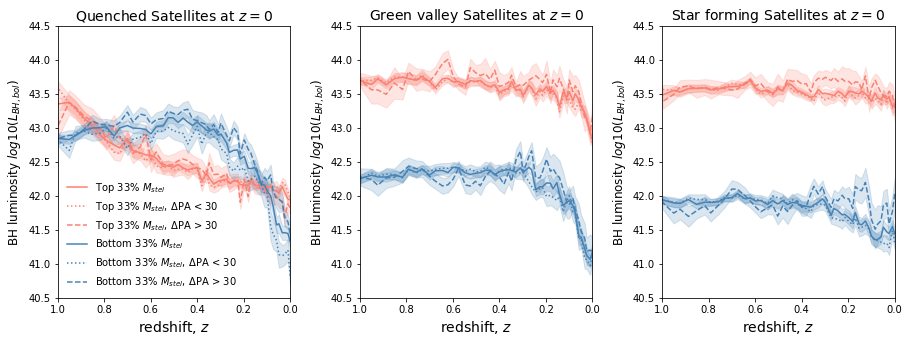

In [163]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey='all', sharex='all')

# Quenched.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_HM_sat.branch_z.values[QU_tab_HM_sat.log10_Lbh_bol.values > 0], QU_tab_HM_sat.log10_Lbh_bol.values[QU_tab_HM_sat.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(QU_align_tab_HM_sat.branch_z.values[QU_align_tab_HM_sat.log10_Lbh_bol.values > 0], QU_align_tab_HM_sat.log10_Lbh_bol.values[QU_align_tab_HM_sat.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$, $\Delta$PA < 30', color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_HM_sat.branch_z.values[QU_mis_tab_HM_sat.log10_Lbh_bol.values > 0], QU_mis_tab_HM_sat.log10_Lbh_bol.values[QU_mis_tab_HM_sat.log10_Lbh_bol.values > 0], ax[0], r'Top 33% $M_{stel}$, $\Delta$PA > 30',color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(QU_tab_LM_sat.branch_z.values[QU_tab_LM_sat.log10_Lbh_bol.values > 0], QU_tab_LM_sat.log10_Lbh_bol.values[QU_tab_LM_sat.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(QU_align_tab_LM_sat.branch_z.values[QU_align_tab_LM_sat.log10_Lbh_bol.values > 0], QU_align_tab_LM_sat.log10_Lbh_bol.values[QU_align_tab_LM_sat.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$, $\Delta$PA < 30', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(QU_mis_tab_LM_sat.branch_z.values[QU_mis_tab_LM_sat.log10_Lbh_bol.values > 0], QU_mis_tab_LM_sat.log10_Lbh_bol.values[QU_mis_tab_LM_sat.log10_Lbh_bol.values > 0], ax[0], r'Bottom 33% $M_{stel}$, $\Delta$PA > 30',color='steelblue', linestyle='dashed') 

ax[0].set_title('Quenched Satellites at $z=0$', fontsize=14)
ax[0].legend(frameon=False, fontsize=10, loc='lower left')
ax[0].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[0].set_xlabel(r'redshift, $z$',fontsize=14)
ax[0].set_xlim([0, 1])
ax[0].set_ylim([40.5, 44.5])
ax[0].invert_xaxis()

# Green valley.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_HM_sat.branch_z.values[GV_tab_HM_sat.log10_Lbh_bol.values > 0], GV_tab_HM_sat.log10_Lbh_bol.values[GV_tab_HM_sat.log10_Lbh_bol.values > 0], ax[1], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(GV_align_tab_HM_sat.branch_z.values[GV_align_tab_HM_sat.log10_Lbh_bol.values > 0], GV_align_tab_HM_sat.log10_Lbh_bol.values[GV_align_tab_HM_sat.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_HM_sat.branch_z.values[GV_mis_tab_HM_sat.log10_Lbh_bol.values > 0], GV_mis_tab_HM_sat.log10_Lbh_bol.values[GV_mis_tab_HM_sat.log10_Lbh_bol.values > 0], ax[1], color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(GV_tab_LM_sat.branch_z.values[GV_tab_LM_sat.log10_Lbh_bol.values > 0], GV_tab_LM_sat.log10_Lbh_bol.values[GV_tab_LM_sat.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(GV_align_tab_LM_sat.branch_z.values[GV_align_tab_LM_sat.log10_Lbh_bol.values > 0], GV_align_tab_LM_sat.log10_Lbh_bol.values[GV_align_tab_LM_sat.log10_Lbh_bol.values > 0], ax[1], r'Bottom 33% $M_{stel}$, $\Delta$PA < 30', color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(GV_mis_tab_LM_sat.branch_z.values[GV_mis_tab_LM_sat.log10_Lbh_bol.values > 0], GV_mis_tab_LM_sat.log10_Lbh_bol.values[GV_mis_tab_LM_sat.log10_Lbh_bol.values > 0], ax[1], 'Bottom 33% $M_{stel}$, $\Delta$PA > 30',color='steelblue', linestyle='dashed') 

ax[1].set_title('Green valley Satellites at $z=0$', fontsize=14)
#ax[1].legend(frameon=False, fontsize=12.5, loc='lower left')
ax[1].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[1].set_xlabel(r'redshift, $z$',fontsize=14)
ax[1].set_xlim([0, 1])
ax[1].invert_xaxis()
ax[1].yaxis.set_tick_params(labelbottom=True)

# Star forming.
# Top 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_HM_sat.branch_z.values[SF_tab_HM_sat.log10_Lbh_bol.values > 0], SF_tab_HM_sat.log10_Lbh_bol.values[SF_tab_HM_sat.log10_Lbh_bol.values > 0], ax[2], r'Top 50% $M_{stel}$', color='salmon')
plot_population.plot_property_evolution(SF_align_tab_HM_sat.branch_z.values[SF_align_tab_HM_sat.log10_Lbh_bol.values > 0], SF_align_tab_HM_sat.log10_Lbh_bol.values[SF_align_tab_HM_sat.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_HM_sat.branch_z.values[SF_mis_tab_HM_sat.log10_Lbh_bol.values > 0], SF_mis_tab_HM_sat.log10_Lbh_bol.values[SF_mis_tab_HM_sat.log10_Lbh_bol.values > 0], ax[2], color='salmon', linestyle='dashed') 
# Bottom 50% $M_{stel}$
plot_population.plot_property_evolution(SF_tab_LM_sat.branch_z.values[SF_tab_LM_sat.log10_Lbh_bol.values > 0], SF_tab_LM_sat.log10_Lbh_bol.values[SF_tab_LM_sat.log10_Lbh_bol.values > 0], ax[2], r'Bottom 50% $M_{stel}$', color='steelblue')
plot_population.plot_property_evolution(SF_align_tab_LM_sat.branch_z.values[SF_align_tab_LM_sat.log10_Lbh_bol.values > 0], SF_align_tab_LM_sat.log10_Lbh_bol.values[SF_align_tab_LM_sat.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dotted') 
plot_population.plot_property_evolution(SF_mis_tab_LM_sat.branch_z.values[SF_mis_tab_LM_sat.log10_Lbh_bol.values > 0], SF_mis_tab_LM_sat.log10_Lbh_bol.values[SF_mis_tab_LM_sat.log10_Lbh_bol.values > 0], ax[2], color='steelblue', linestyle='dashed') 

ax[2].set_title('Star forming Satellites at $z=0$', fontsize=14)
#ax[2].legend(frameon=False, fontsize=12.5, loc='lower left')
ax[2].set_ylabel(r'BH luminosity $log10(L_{BH, bol})$', fontsize=12)
ax[2].set_xlabel(r'redshift, $z$',fontsize=14)
ax[2].set_xlim([0, 1])
ax[2].invert_xaxis()
ax[2].yaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(wspace=0.3)
plt.show()